In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('./Downloads/supply_chain_data.csv')

Paso 1: Análisis Estadístico Descriptivo

In [7]:
print(data)

   Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661

In [3]:
# Resumen estadístico de las variables numéricas
description = data.describe()
print(description)

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

Paso 2: Visualización de Datos

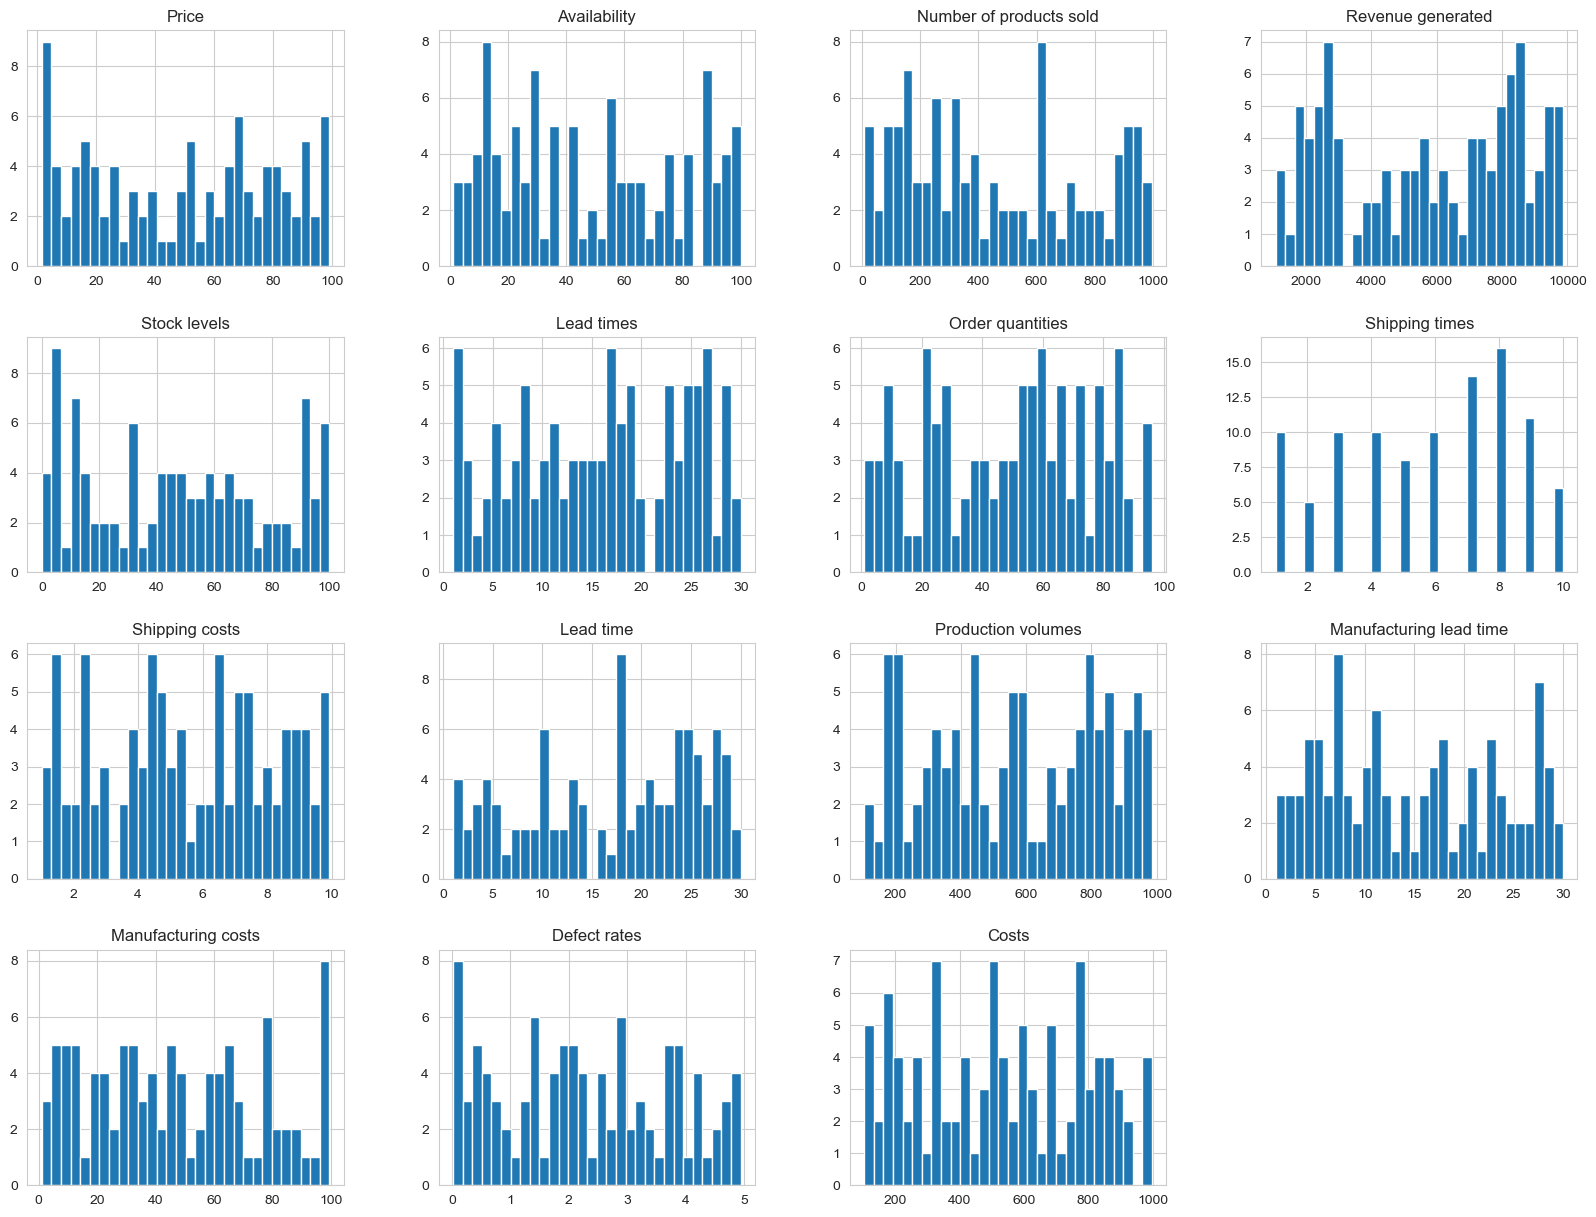

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")

# Histogramas para las variables numéricas
data.hist(bins=30, figsize=(20, 15))
plt.show()

Paso 3: Limpieza de Datos

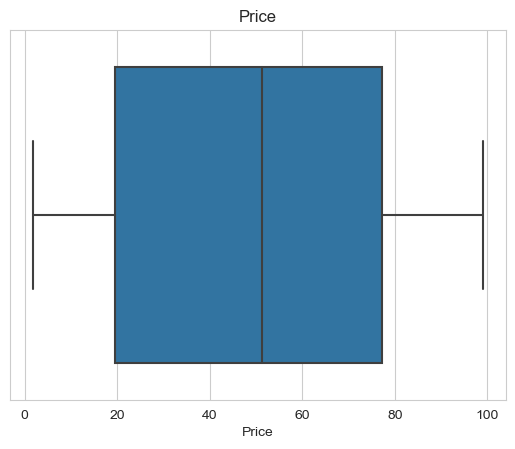

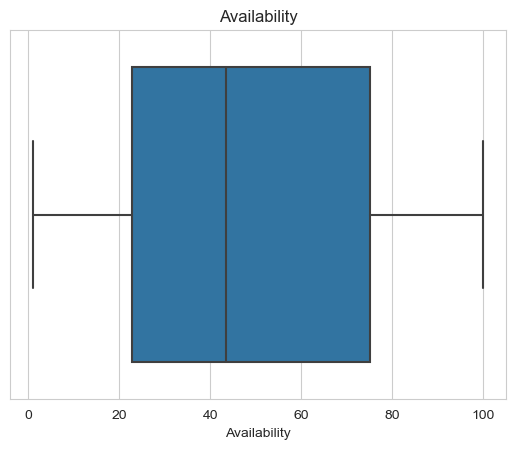

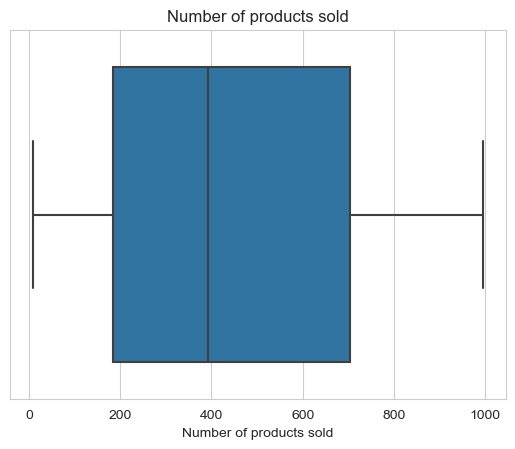

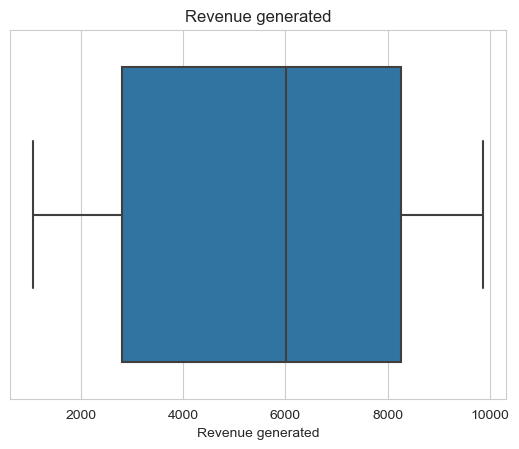

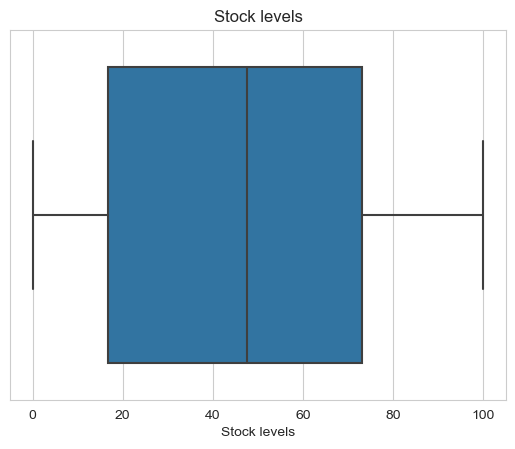

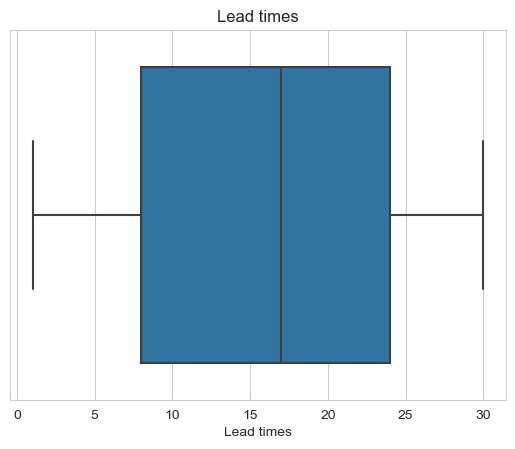

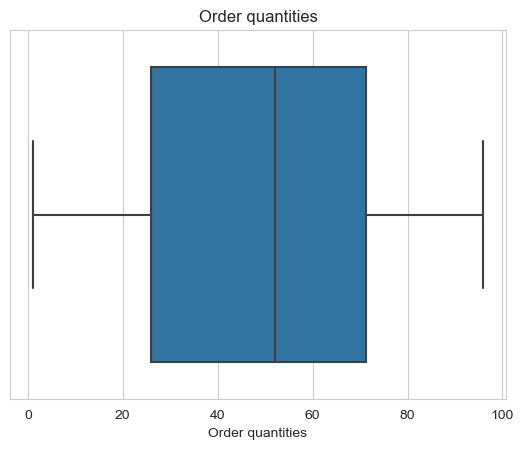

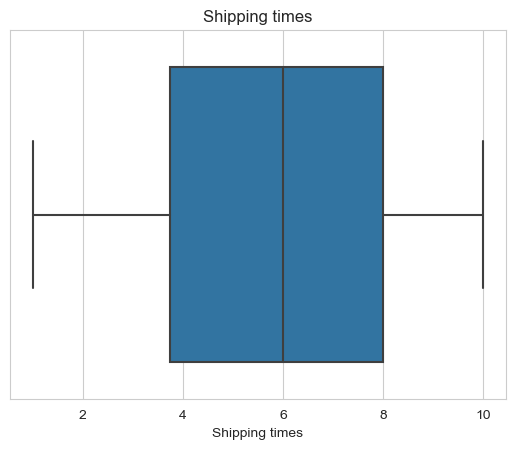

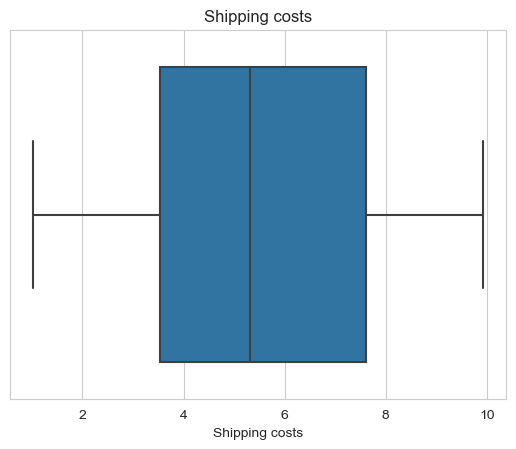

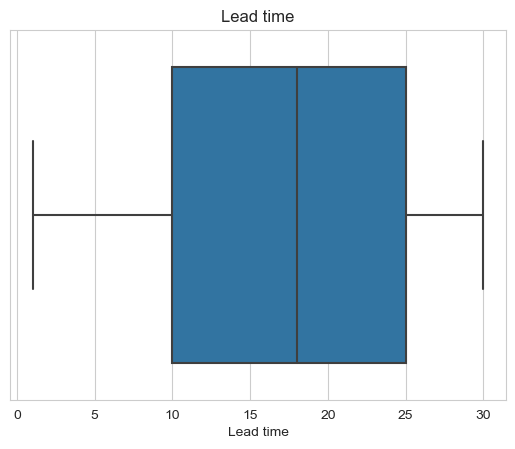

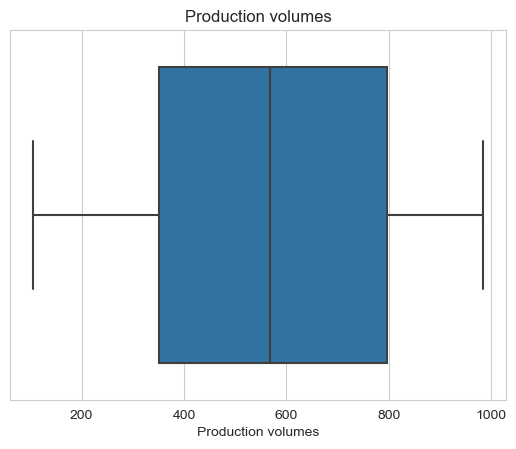

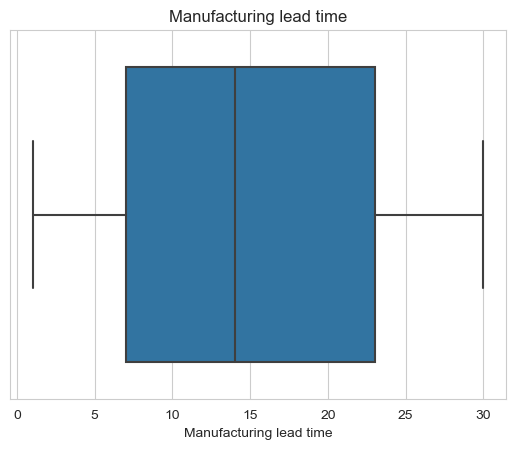

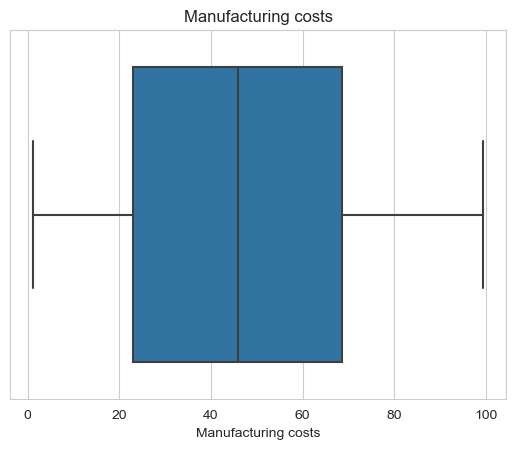

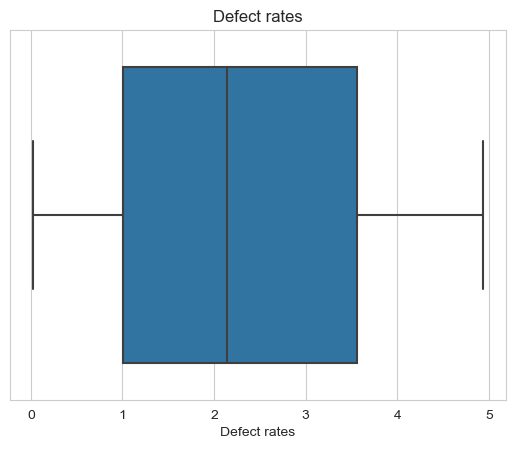

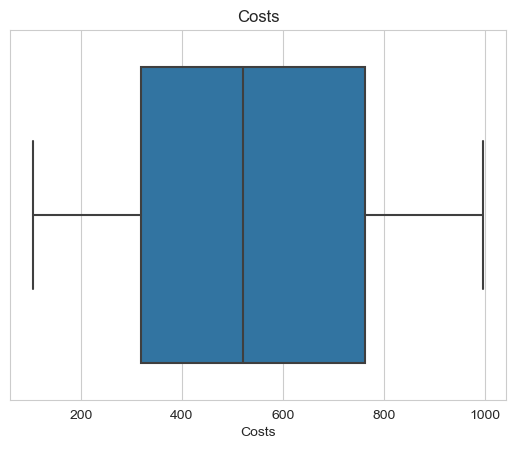

In [5]:
# Identificación de valores atípicos (puedes ajustar esta sección según tus necesidades)
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()

Paso 4: Análisis de Correlación

C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\1252147827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


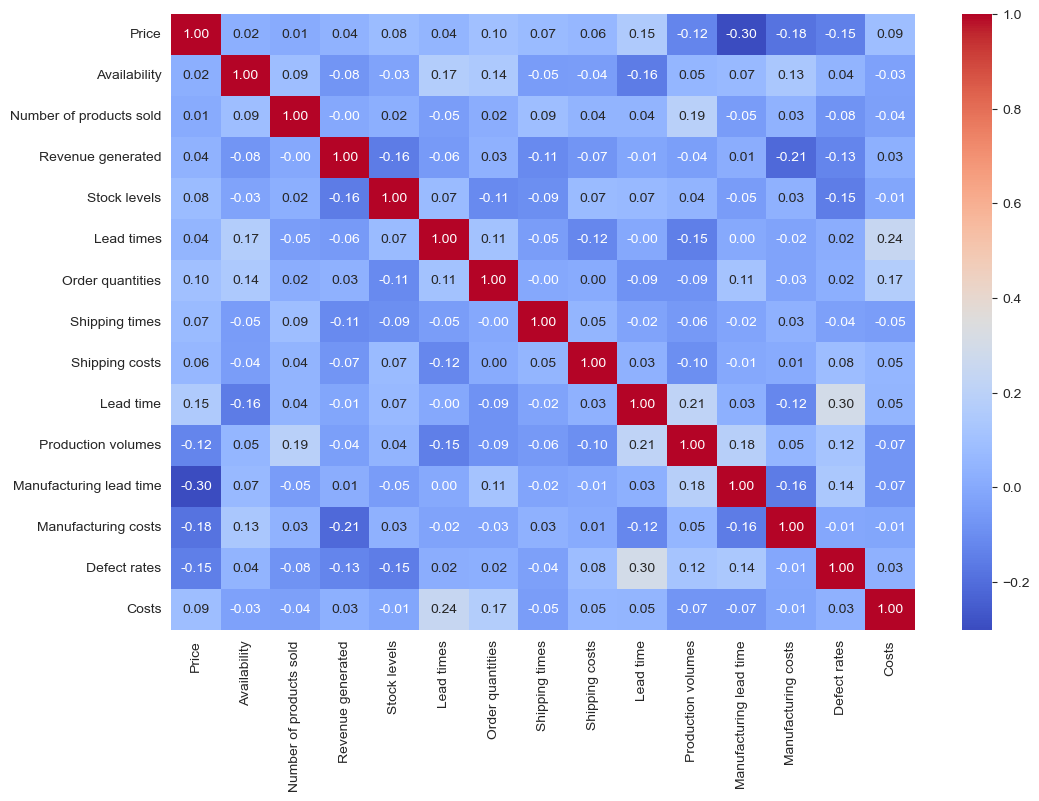

In [6]:
# Matriz de correlación
correlation_matrix = data.corr()

# Mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Analizamos la variable Location

C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\1177876613.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y=variable, data=data, ci=None)  # ci=None para desactivar el cálculo del intervalo de confianza
C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\1177876613.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y=variable, data=data, ci=None)  # ci=None para desactivar el cálculo del intervalo de confianza
C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\1177876613.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y=variable, data=data, ci=None)  # ci=None para desactivar el cálculo del intervalo de confianza
C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\1177876613.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=N

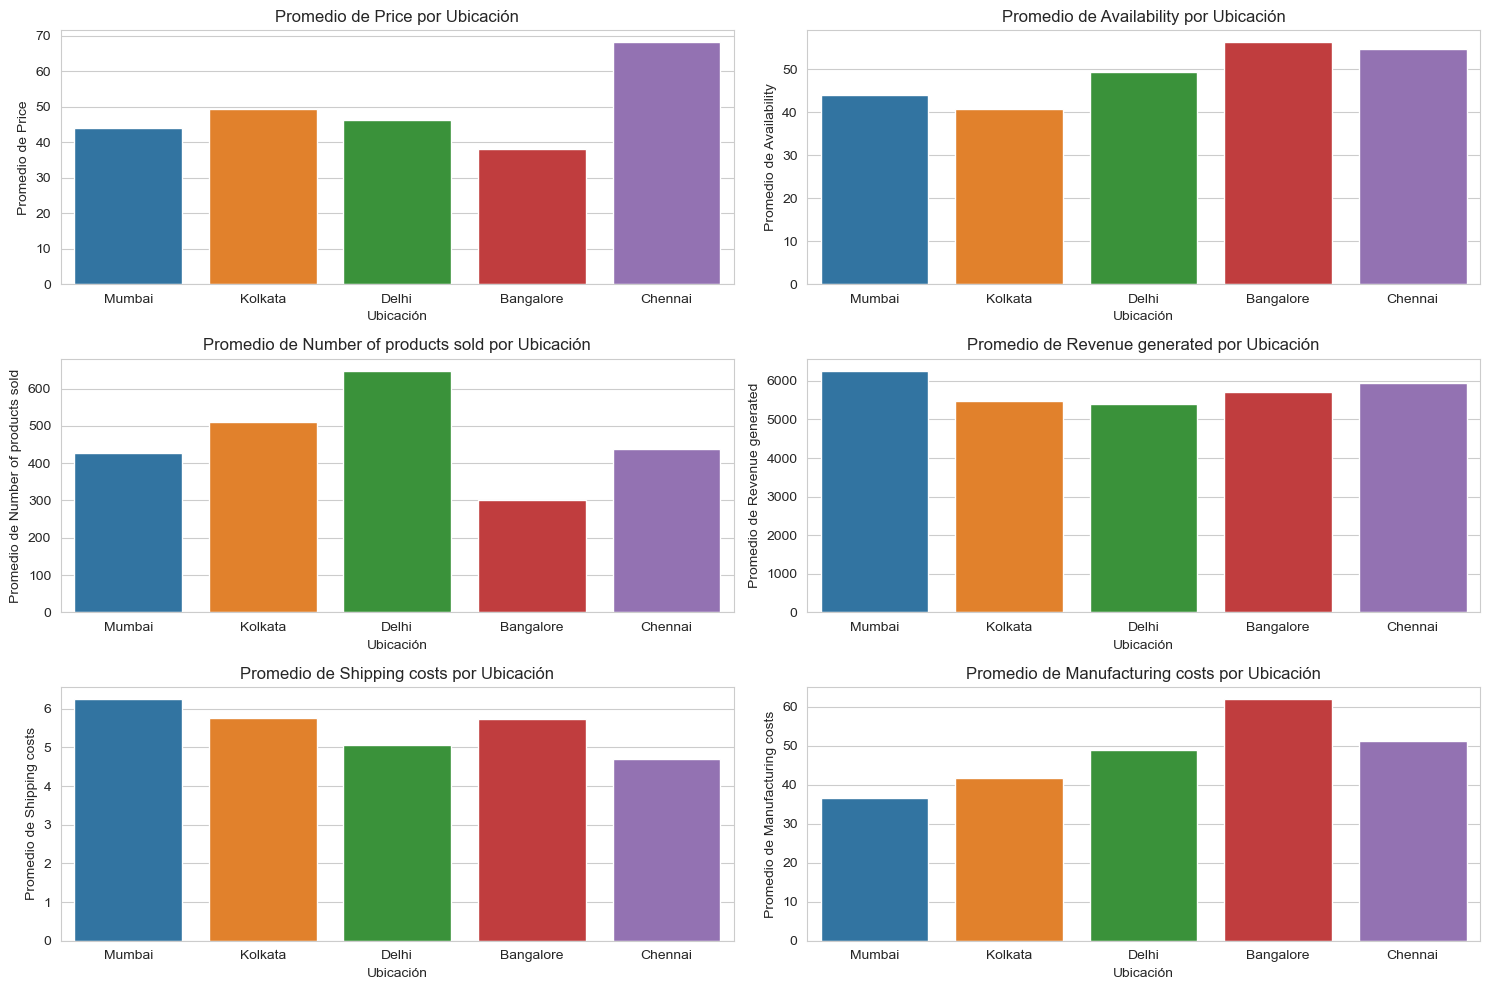

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tus datos
data = pd.read_csv('./Downloads/supply_chain_data.csv')

# Configurar el tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Lista de variables numéricas para analizar
numeric_variables = ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Shipping costs', 'Manufacturing costs']

# Crear gráficos de barras para las variables numéricas por ubicación
for i, variable in enumerate(numeric_variables, start=1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Location', y=variable, data=data, ci=None)  # ci=None para desactivar el cálculo del intervalo de confianza
    plt.title(f'Promedio de {variable} por Ubicación')
    plt.ylabel(f'Promedio de {variable}')
    plt.xlabel('Ubicación')

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()

Análisis por tipo de producto:

In [10]:
import pandas as pd

# Cargar tus datos
data = pd.read_csv('./Downloads/supply_chain_data.csv')

# 1) Producto Más Vendido
producto_mas_vendido = data.groupby('Product type')['Number of products sold'].sum().idxmax()
ventas_producto_mas_vendido = data.groupby('Product type')['Number of products sold'].sum().max()

# 2) Productos Más Vendidos por Ubicación
productos_mas_vendidos_por_location = data.groupby(['Location', 'Product type'])['Number of products sold'].sum().unstack().idxmax(axis=1)

# 3) Ingresos Generados por Cada Producto
revenue_por_producto = data.groupby('Product type')['Revenue generated'].sum()

# 4) Costes Asociados a Cada Producto
costes_por_producto = data.groupby('Product type')[['Shipping costs', 'Manufacturing costs']].sum().sum(axis=1)

print("Producto Más Vendido:", producto_mas_vendido)
print("Ventas del Producto Más Vendido:", ventas_producto_mas_vendido)
print("\nProductos Más Vendidos por Ubicación:\n", productos_mas_vendidos_por_location)
print("\nIngresos Generados por Cada Producto:\n", revenue_por_producto)
print("\nCostes Asociados a Cada Producto:\n", costes_por_producto)

Producto Más Vendido: skincare
Ventas del Producto Más Vendido: 20731

Productos Más Vendidos por Ubicación:
 Location
Bangalore     haircare
Chennai       skincare
Delhi        cosmetics
Kolkata       skincare
Mumbai       cosmetics
dtype: object

Ingresos Generados por Cada Producto:
 Product type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: Revenue generated, dtype: float64

Costes Asociados a Cada Producto:
 Product type
cosmetics    1276.934916
haircare     1848.435511
skincare     2156.113805
dtype: float64


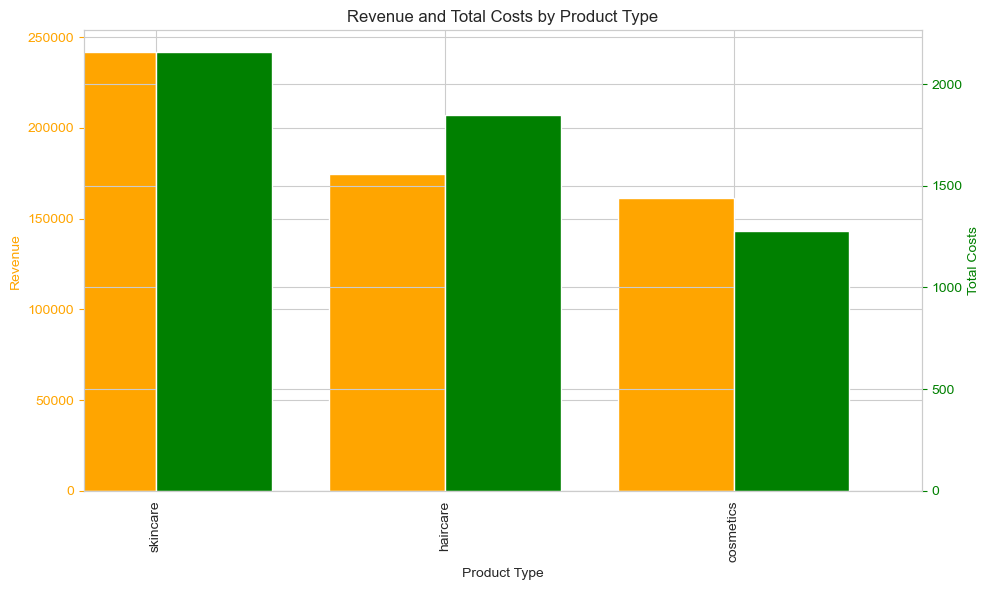

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar tus datos
data = pd.read_csv('./Downloads/supply_chain_data.csv')

# Agrupar los datos por tipo de producto
grouped_data = data.groupby('Product type').agg({
    'Revenue generated': 'sum',
    'Manufacturing costs': 'sum',
    'Shipping costs': 'sum'
}).sort_values(by='Revenue generated', ascending=False)

# Calcular los costos totales
grouped_data['Total costs'] = grouped_data['Manufacturing costs'] + grouped_data['Shipping costs']

# Crear el gráfico de barras con doble eje Y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot para los ingresos
grouped_data['Revenue generated'].plot(kind='bar', ax=ax1, position=1, color='orange', width=0.4)

# Configurar el eje y para los ingresos
ax1.set_ylabel('Revenue', color='orange')
ax1.tick_params('y', colors='orange')
ax1.set_xlabel('Product Type')

# Crear un segundo eje y para los costos
ax2 = ax1.twinx()

# Bar plot para los costos totales
grouped_data['Total costs'].plot(kind='bar', ax=ax2, position=0, color='green', width=0.4)

# Configurar el eje y para los costos
ax2.set_ylabel('Total Costs', color='green')
ax2.tick_params('y', colors='green')

# Título y mostrar el gráfico
plt.title('Revenue and Total Costs by Product Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis de la Rutas

 1. Número de Productos Vendidos

C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\3063717548.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Routes', y='Number of products sold', data=data, estimator=sum, ci=None)


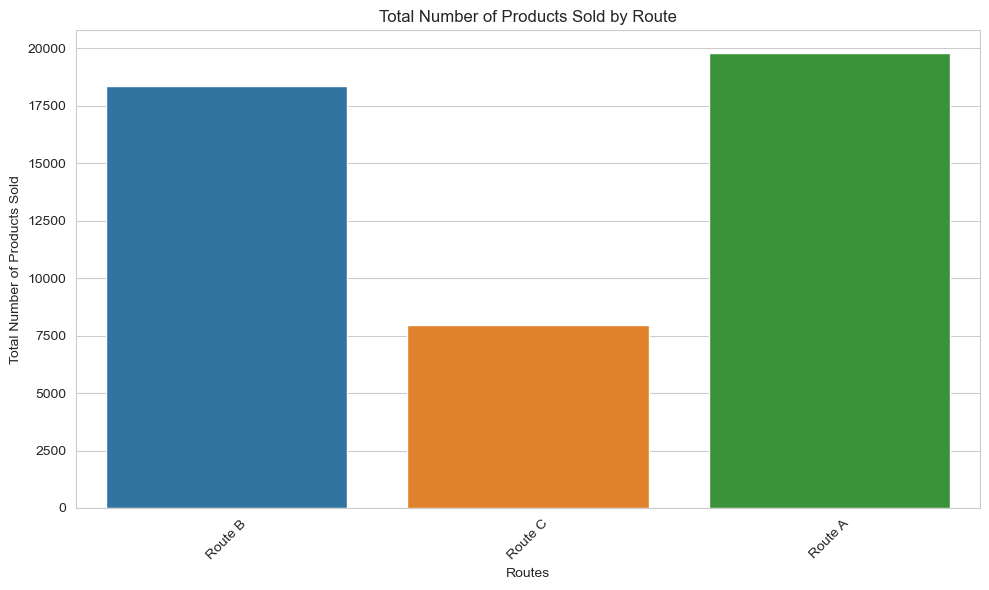

('Route A', 'Route C')

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tus datos
data = pd.read_csv('./Downloads/supply_chain_data.csv')

# Gráfico de barras para la cantidad de productos vendidos por ruta
plt.figure(figsize=(10, 6))
sns.barplot(x='Routes', y='Number of products sold', data=data, estimator=sum, ci=None)
plt.title('Total Number of Products Sold by Route')
plt.ylabel('Total Number of Products Sold')
plt.xlabel('Routes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis para identificar la ruta con más y menos ventas
total_products_sold_by_route = data.groupby('Routes')['Number of products sold'].sum()
most_sold_route = total_products_sold_by_route.idxmax()
least_sold_route = total_products_sold_by_route.idxmin()

most_sold_route, least_sold_route

2. Ingresos Generados (Revenue)

C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\3707710301.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Routes', y='Revenue generated', data=data, estimator=sum, ci=None)


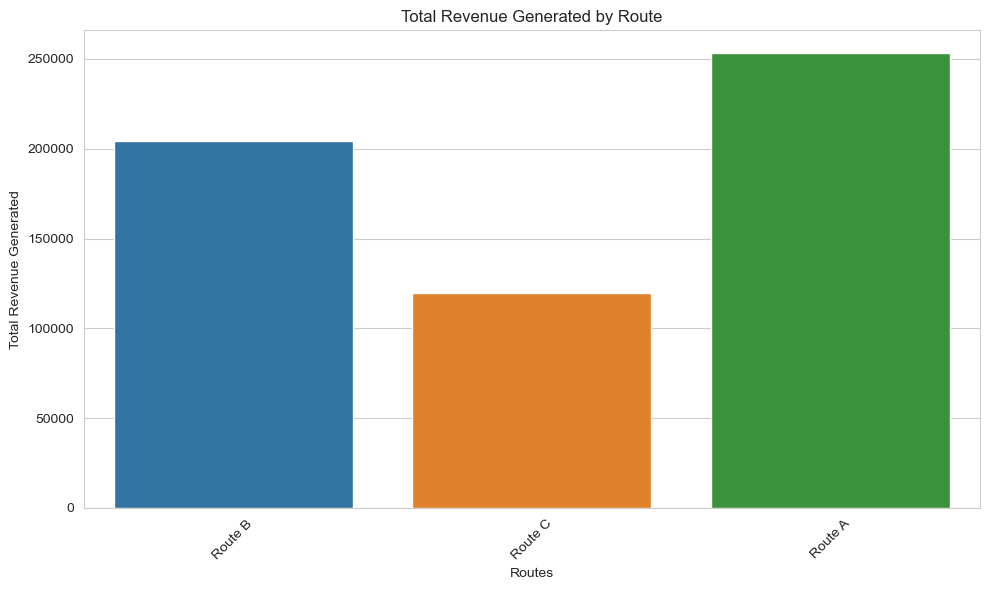

('Route A', 'Route C')

In [29]:
# Gráfico de barras para los ingresos generados por ruta
plt.figure(figsize=(10, 6))
sns.barplot(x='Routes', y='Revenue generated', data=data, estimator=sum, ci=None)
plt.title('Total Revenue Generated by Route')
plt.ylabel('Total Revenue Generated')
plt.xlabel('Routes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis para identificar la ruta con más y menos ingresos
total_revenue_by_route = data.groupby('Routes')['Revenue generated'].sum()
most_revenue_route = total_revenue_by_route.idxmax()
least_revenue_route = total_revenue_by_route.idxmin()

most_revenue_route, least_revenue_route

3. Beneficio Neto (Net Profit)

C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\1089580211.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Routes', y='Net Profit', data=data, estimator=sum, ci=None)


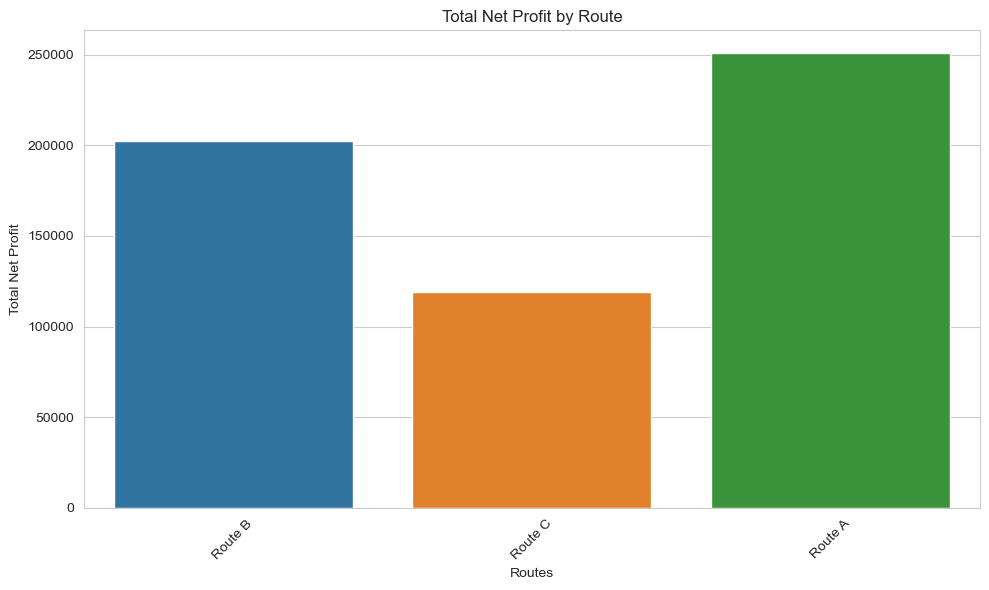

('Route A', 'Route C')

In [31]:
# Cálculo del beneficio neto para cada ruta
data['Net Profit'] = data['Revenue generated'] - (data['Manufacturing costs'] + data['Shipping costs'])

# Gráfico de barras para el beneficio neto por ruta
plt.figure(figsize=(10, 6))
sns.barplot(x='Routes', y='Net Profit', data=data, estimator=sum, ci=None)
plt.title('Total Net Profit by Route')
plt.ylabel('Total Net Profit')
plt.xlabel('Routes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis para identificar la ruta más y menos rentable
total_net_profit_by_route = data.groupby('Routes')['Net Profit'].sum()
most_profitable_route = total_net_profit_by_route.idxmax()
least_profitable_route = total_net_profit_by_route.idxmin()

most_profitable_route, least_profitable_route

4. Costos de Fabricación y Envío (Manufacturing and Shipping Costs)

C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\3337187652.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Routes', y='Manufacturing costs', data=data, estimator=sum, ci=None, color='b', label='Manufacturing Costs')
C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\3337187652.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Routes', y='Shipping costs', data=data, estimator=sum, ci=None, color='r', label='Shipping Costs')


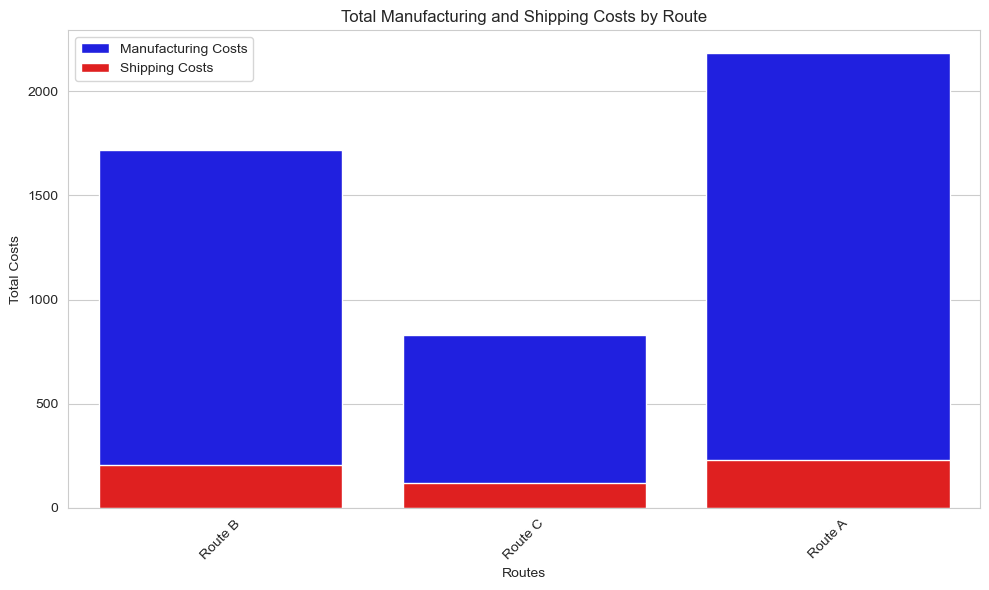

('Route A', 'Route C')

In [33]:
# Gráfico de barras agrupado para los costos de fabricación y envío por ruta
plt.figure(figsize=(10, 6))
sns.barplot(x='Routes', y='Manufacturing costs', data=data, estimator=sum, ci=None, color='b', label='Manufacturing Costs')
sns.barplot(x='Routes', y='Shipping costs', data=data, estimator=sum, ci=None, color='r', label='Shipping Costs')
plt.title('Total Manufacturing and Shipping Costs by Route')
plt.ylabel('Total Costs')
plt.xlabel('Routes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Análisis para identificar la ruta con más y menos costos
total_manufacturing_costs_by_route = data.groupby('Routes')['Manufacturing costs'].sum()
total_shipping_costs_by_route = data.groupby('Routes')['Shipping costs'].sum()
most_costly_route = (total_manufacturing_costs_by_route + total_shipping_costs_by_route).idxmax()
least_costly_route = (total_manufacturing_costs_by_route + total_shipping_costs_by_route).idxmin()

most_costly_route, least_costly_route

5. Disponibilidad de Productos (Availability)

C:\Users\regidor\AppData\Local\Temp\ipykernel_11996\4293951407.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Routes', y='Availability', data=data, estimator=np.mean, ci=None)


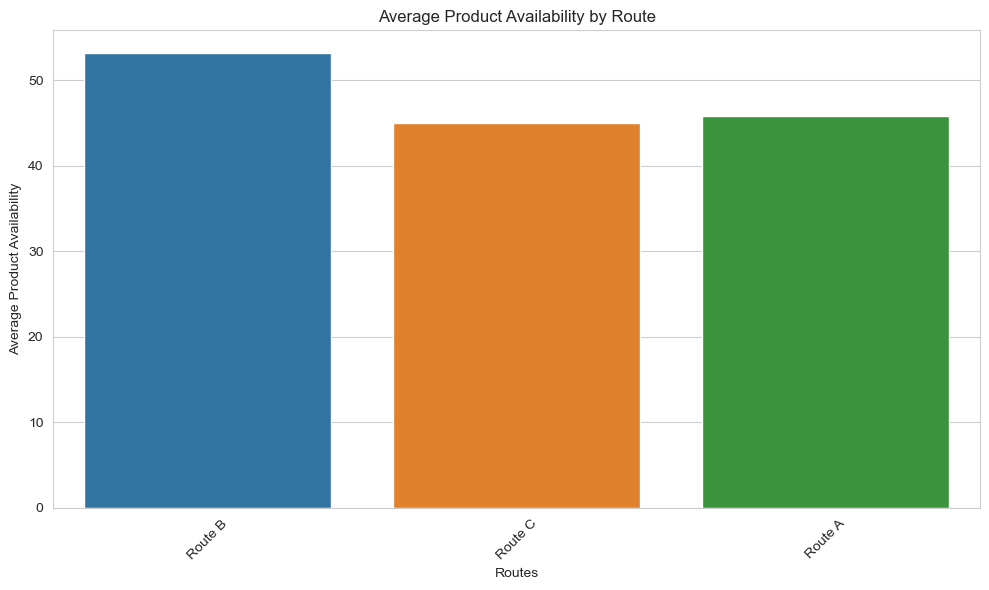

('Route B', 'Route C')

In [34]:
# Gráfico de barras para la disponibilidad de productos por ruta
plt.figure(figsize=(10, 6))
sns.barplot(x='Routes', y='Availability', data=data, estimator=np.mean, ci=None)
plt.title('Average Product Availability by Route')
plt.ylabel('Average Product Availability')
plt.xlabel('Routes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis para identificar la ruta con mayor y menor disponibilidad de productos
average_availability_by_route = data.groupby('Routes')['Availability'].mean()
highest_availability_route = average_availability_by_route.idxmax()
lowest_availability_route = average_availability_by_route.idxmin()

highest_availability_route, lowest_availability_route

1. Distribución de Modos de Transporte por Ruta

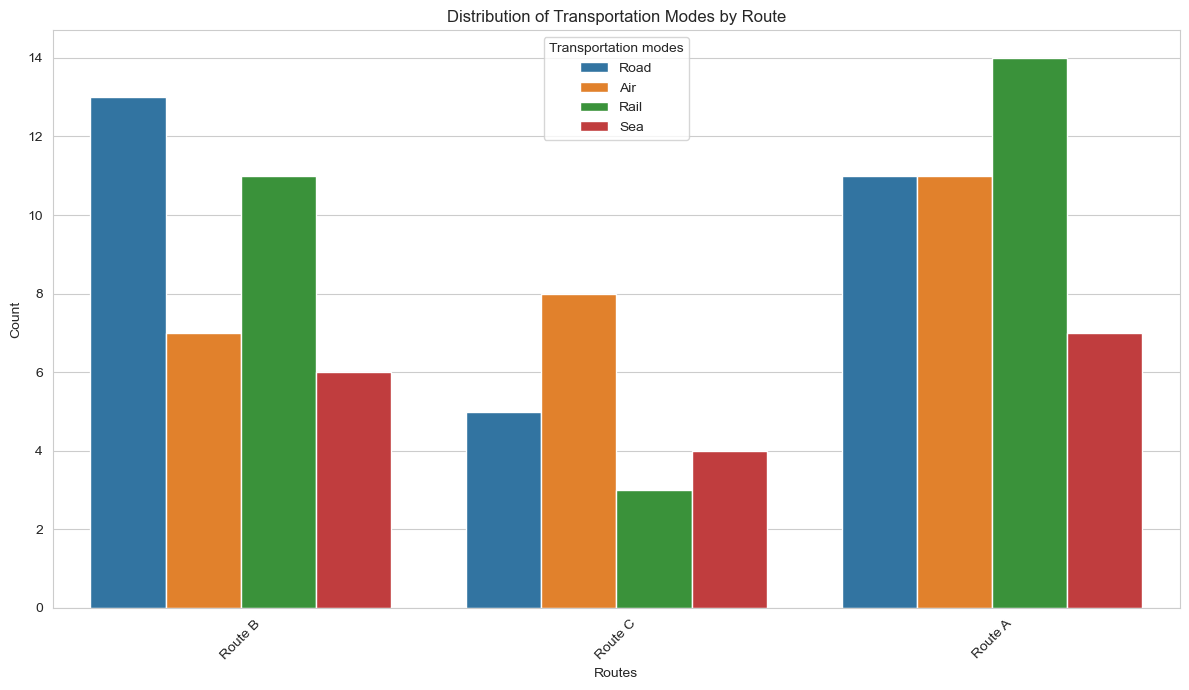

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tus datos
data = pd.read_csv('./Downloads/supply_chain_data.csv')

# Gráfico para visualizar la frecuencia de cada modo de transporte en cada ruta
plt.figure(figsize=(12, 7))
sns.countplot(x='Routes', hue='Transportation modes', data=data)
plt.title('Distribution of Transportation Modes by Route')
plt.xlabel('Routes')
plt.ylabel('Count')
plt.legend(title='Transportation modes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Ruta Preferida por Modo de Transporte

In [37]:
# Identificar cuál es la ruta más utilizada para cada modo de transporte
most_preferred_route_by_transport_mode = data.groupby('Transportation modes')['Routes'].apply(lambda x: x.mode().iloc[0])
most_preferred_route_by_transport_mode

Transportation modes
Air     Route A
Rail    Route A
Road    Route B
Sea     Route A
Name: Routes, dtype: object

3. Modo de Transporte Preferido por Ruta

In [38]:
# Identificar cuál es el modo de transporte más utilizado en cada ruta
most_preferred_transport_mode_by_route = data.groupby('Routes')['Transportation modes'].apply(lambda x: x.mode().iloc[0])
most_preferred_transport_mode_by_route

Routes
Route A    Rail
Route B    Road
Route C     Air
Name: Transportation modes, dtype: object

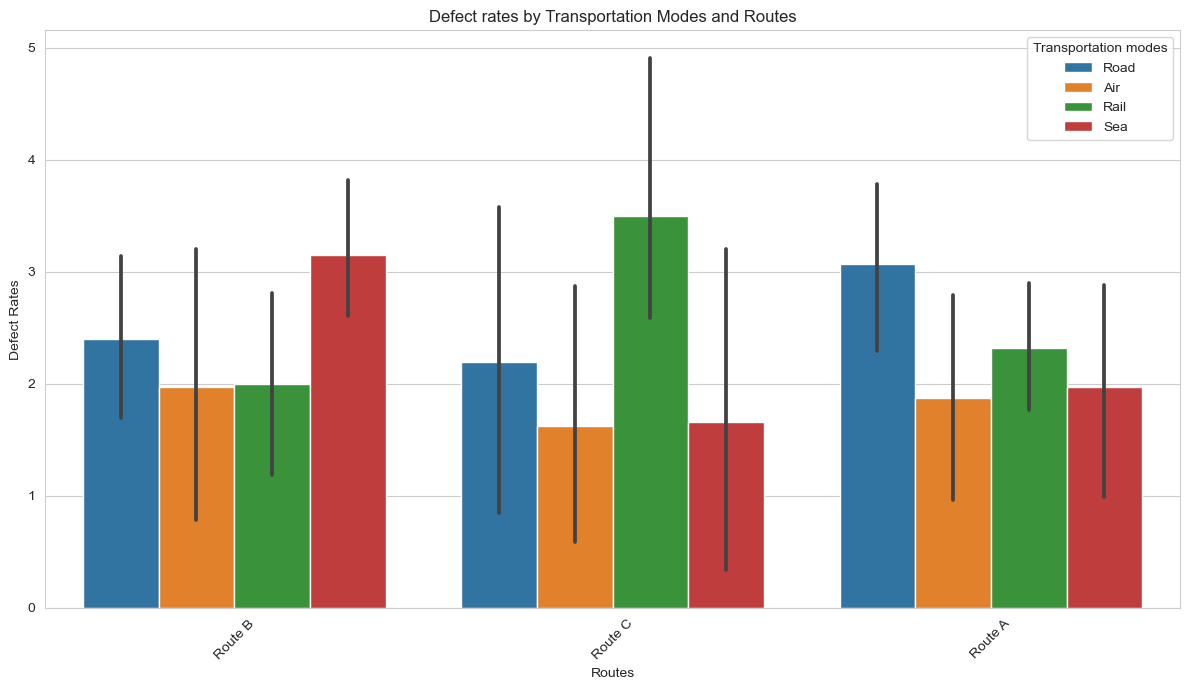

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tus datos
data = pd.read_csv('./Downloads/supply_chain_data.csv')

# Gráfico de barras agrupado para tasas de defectos
plt.figure(figsize=(12, 7))
sns.barplot(x='Routes', y='Defect rates', hue='Transportation modes', data=data)
plt.title('Defect rates by Transportation Modes and Routes')
plt.xlabel('Routes')
plt.ylabel('Defect Rates')
plt.xticks(rotation=45)
plt.legend(title='Transportation modes')
plt.tight_layout()
plt.show()